In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image


def show(path, sz=(8, 8)):
    img = mpimg.imread(path)
    plt.figure(figsize=sz)
    plt.axis("off")
    plt.imshow(img)

# Visualizing Hierarchies
- We need to communicate our insights to other people through visualization.
- Hierarchical Clustering is great visualizing communication insight!

## Eurovision scoring dataset
- Countries gave scores to songs performed at the Eurovision 2016

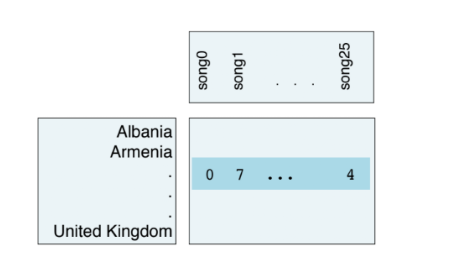

In [29]:
show(r"images/eurovision_2016.png")

# Dendrogram of voting countries

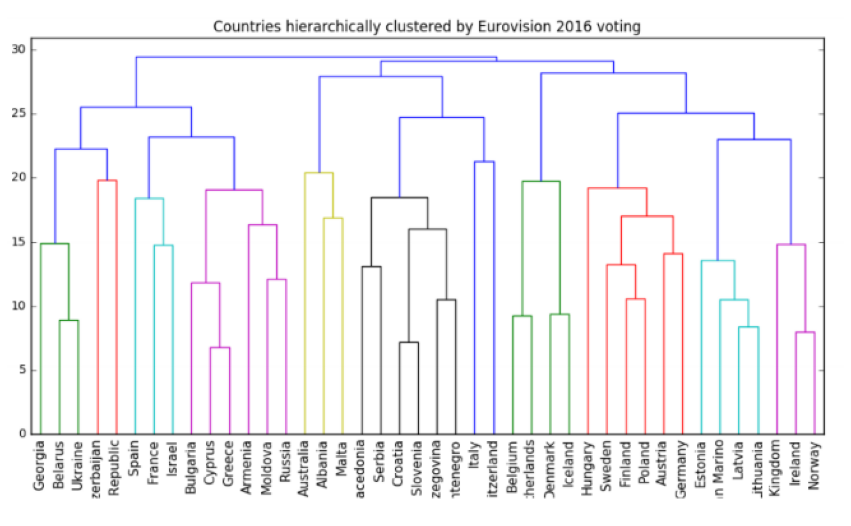

In [30]:
show(r"images/dendrogram.png", sz=(15, 10))

### Conclusion:
Clusters are immediately recognizable as containing the countries that are close to one another geographically, or that have close cultural or political ties, or that belong to same language group.

## Agglomerative Clustering
- Each country begins in a separate cluster
- At each step two closest clusters are merged
- This works like segment trees

## Divisive Clustering
- Initially, all data is in the same cluster
- The largest cluster is split until every object is separate
- Because there exist ways of splitting each cluster, heuristics are needed

In [2]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display

plt.style.use("ggplot")
sns.set()

In [4]:
df = pd.read_csv("./datasets/seeds.csv")
display(df.head())
samples = df.iloc[:, :-1].values
varieties = df.iloc[:, -1].values

,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
0,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
1,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
2,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
3,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat
4,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,Kama wheat


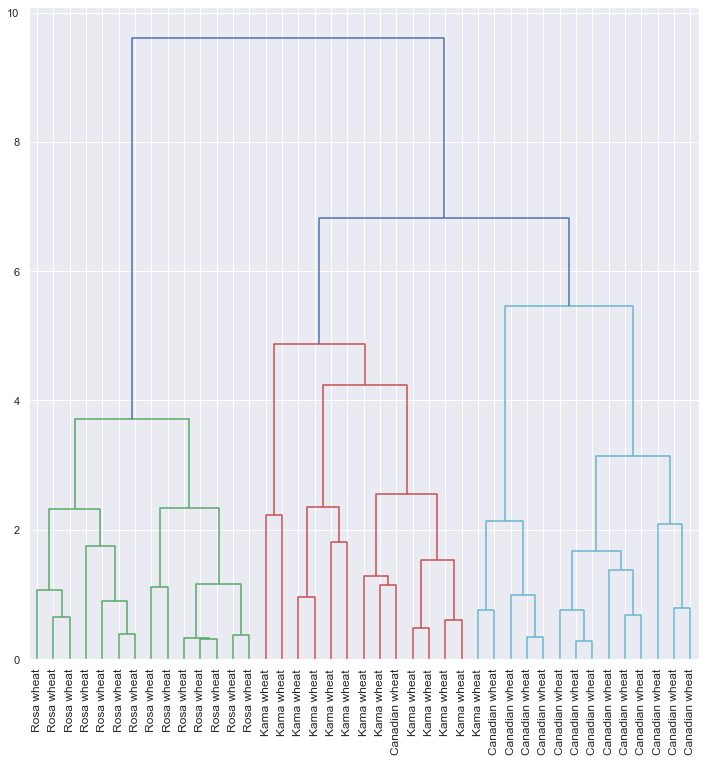

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method="complete")


# Plot the dendrogram, using varieties as labels
_ = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=12)
plt.show()

## Intermediate clusterings & height on dendrogram
- Clustering labels at any **intermediate stage** can be recovered like for use in cross-tabulations
- Height on dendrogram = distance between merging clusters
- Height on dendrogram specifies max. distance between merging clusters

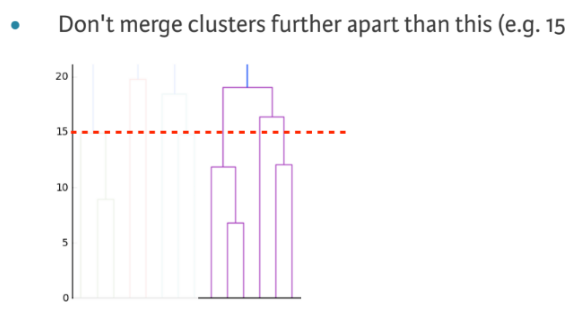

In [34]:
show(r"images/intermediate_clustering.png", sz=(10, 10))

- During merging the distance between two clusters is defined by **linkage method**
- As we used above, in complete linkage distance between clusters is max. distance between their samples
- Different linkage method leads to different hierarchical clustering

## Extracting cluster labels using fcluster

## Different linkage, different hierarchical clustering
- Complete linkage method follows maximum distance between cluster points
- Single linkage method follows minimum distance between cluster points

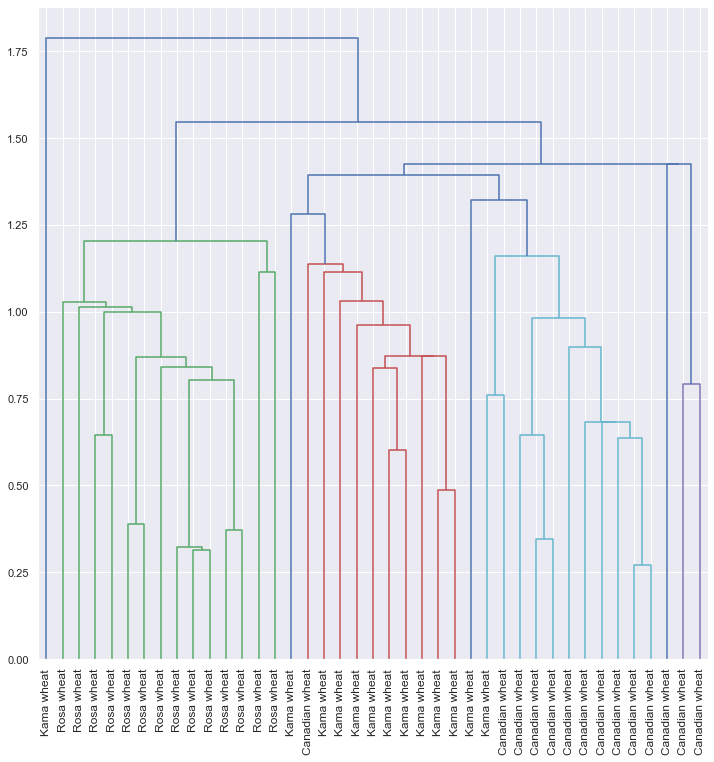

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method="single")


# Plot the dendrogram, using varieties as labels
_ = plt.subplots(1, 1, figsize=(12, 12))
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=12)
plt.show()

In [36]:
from scipy.cluster.hierarchy import fcluster

mergings = linkage(samples, method="complete")

# Use fcluster to extract labels: labels
# At distance 6 in dendrogram we have 3 clusters which are suitable for 3 different type of seeds.
labels = fcluster(mergings, 6, criterion="distance")

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({"labels": labels, "varieties": varieties})

# Create crosstab: ct
ct = pd.crosstab(df["labels"], df["varieties"])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          14
2                       1          12           0
3                      13           1           0
